In [1]:
pip install mediapipe

DEPRECATION: Loading egg at f:\anaconda\lib\site-packages\torchlight-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [6]:
yoga_train_images_dir = 'F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/DATASET/TRAIN'
yoga_test_images_dir = 'F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/DATASET/TEST'

keypoint_test_dir = 'F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/testkeypoints'
keypoint_train_dir = 'F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/trainkeypoints'

In [3]:
pip install --upgrade tensorflow-io

     ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
     --------------------------------------- 0.0/22.9 MB 325.1 kB/s eta 0:01:11
     --------------------------------------- 0.1/22.9 MB 465.5 kB/s eta 0:00:49
     ---------------------------------------- 0.2/22.9 MB 1.1 MB/s eta 0:00:21
      --------------------------------------- 0.5/22.9 MB 2.4 MB/s eta 0:00:10
     - -------------------------------------- 0.6/22.9 MB 2.5 MB/s eta 0:00:10
     - -------------------------------------- 1.1/22.9 MB 3.5 MB/s eta 0:00:07
     -- ------------------------------------- 1.4/22.9 MB 4.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.8/22.9 MB 4.6 MB/s eta 0:00:05
     --- ------------------------------------ 2.2/22.9 MB 5.1 MB/s eta 0:00:05
     ---- ----------------------------------- 2.6/22.9 MB 5.3 MB/s eta 0:00:04
     ----- ---------------------------------- 3.0/22.9 MB 5.6 MB

DEPRECATION: Loading egg at f:\anaconda\lib\site-packages\torchlight-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [4]:
import cv2
import numpy as np
import os
import tqdm
from mediapipe.python.solutions import drawing_utils as mp_drawing
from mediapipe.python.solutions import pose as mp_pose

In [7]:
pose_class_names = sorted([n for n in os.listdir(yoga_train_images_dir)])

for pose_class_name in pose_class_names:
    image_names = sorted([n for n in os.listdir(os.path.join(yoga_train_images_dir, pose_class_name))])

    try:
        os.makedirs(os.path.join(keypoint_train_dir, pose_class_name))
    except:
        break

    print("Bootstrapping", pose_class_name)
    for image_name in tqdm.tqdm(image_names):
        input_frame = cv2.imread(os.path.join(yoga_train_images_dir, pose_class_name, image_name))
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

        with mp_pose.Pose() as pose_tracker:
            result = pose_tracker.process(image=input_frame)
            pose_landmarks = result.pose_landmarks

        output_frame = input_frame.copy()
        mp_drawing.draw_landmarks(image=output_frame, landmark_list=pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

        output_frame = cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR)
        # cv2.imwrite(os.path.join(train_outputs_dir, image_name), output_frame)

        if pose_landmarks is not None:
            pose_landmarks = [[landmark.x, landmark.y, landmark.z] for landmark in pose_landmarks.landmark]
            frame_height, frame_width = output_frame.shape[:2]

            # question: does de-normalizing keypoint coordinates affect training? Later, try training network using [0,1] normalization of coordinates instead of absolute
            pose_landmarks *= np.array([frame_height, frame_height, frame_width])

            pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.float32).tolist()

            npy_savepath = os.path.join(keypoint_train_dir, pose_class_name, image_name[0:-4]) # remove any .jpg, .png, etc suffix
            np.save(npy_savepath, pose_landmarks)

Bootstrapping downdog


100%|██████████| 223/223 [01:05<00:00,  3.39it/s]


Bootstrapping goddess


100%|██████████| 180/180 [00:53<00:00,  3.38it/s]


Bootstrapping plank


100%|██████████| 266/266 [01:18<00:00,  3.41it/s]


Bootstrapping tree


100%|██████████| 160/160 [00:48<00:00,  3.28it/s]


Bootstrapping warrior2


100%|██████████| 252/252 [01:14<00:00,  3.40it/s]


In [8]:
pose_class_names = sorted([n for n in os.listdir(yoga_test_images_dir)])

for pose_class_name in pose_class_names:
    image_names = sorted([n for n in os.listdir(os.path.join(yoga_test_images_dir, pose_class_name))])

    try:
        os.makedirs(os.path.join(keypoint_test_dir, pose_class_name))
    except:
        break

    print("Bootstrapping", pose_class_name)
    for image_name in tqdm.tqdm(image_names):
        input_frame = cv2.imread(os.path.join(yoga_test_images_dir, pose_class_name, image_name))
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

        with mp_pose.Pose() as pose_tracker:
            result = pose_tracker.process(image=input_frame)
            pose_landmarks = result.pose_landmarks

        output_frame = input_frame.copy()
        mp_drawing.draw_landmarks(image=output_frame, landmark_list=pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

        output_frame = cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR)
        # cv2.imwrite(os.path.join(train_outputs_dir, image_name), output_frame)

        if pose_landmarks is not None:
            pose_landmarks = [[landmark.x, landmark.y, landmark.z] for landmark in pose_landmarks.landmark]
            frame_height, frame_width = output_frame.shape[:2]

            # question: does de-normalizing keypoint coordinates affect training? Later, try training network using [0,1] normalization of coordinates instead of absolute
            pose_landmarks *= np.array([frame_height, frame_height, frame_width])

            pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.float32).tolist()

            npy_savepath = os.path.join(keypoint_test_dir, pose_class_name, image_name[0:-4]) # remove any .jpg, .png, etc suffix
            np.save(npy_savepath, pose_landmarks)

Bootstrapping downdog


100%|██████████| 97/97 [00:29<00:00,  3.28it/s]


Bootstrapping goddess


100%|██████████| 80/80 [00:24<00:00,  3.22it/s]


Bootstrapping plank


100%|██████████| 115/115 [00:36<00:00,  3.17it/s]


Bootstrapping tree


100%|██████████| 69/69 [00:22<00:00,  3.04it/s]


Bootstrapping warrior2


100%|██████████| 109/109 [00:33<00:00,  3.25it/s]


In [9]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob

In [10]:
label_map = {label:num for num,label in enumerate(pose_class_names)}
print(label_map)

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}


In [11]:
sequencestrain, labelstrain = [], []

for pose_class_name in pose_class_names:
    keypoint_names = glob(os.path.join(keypoint_train_dir, pose_class_name, "*.npy"))

    print("searching through {}".format(pose_class_name))
    for keypoint_name in tqdm.tqdm(keypoint_names):
        file = np.load(keypoint_name)
        sequencestrain.append(file)
        labelstrain.append(label_map[pose_class_name])

searching through downdog


100%|██████████| 199/199 [00:01<00:00, 122.41it/s]


searching through goddess


100%|██████████| 172/172 [00:01<00:00, 158.31it/s]


searching through plank


100%|██████████| 263/263 [00:01<00:00, 137.72it/s]


searching through tree


100%|██████████| 159/159 [00:01<00:00, 149.78it/s]


searching through warrior2


100%|██████████| 249/249 [00:01<00:00, 177.36it/s]


In [12]:
sequencestest, labelstest = [], []

for pose_class_name in pose_class_names:
    keypoint_names = glob(os.path.join(keypoint_test_dir, pose_class_name, "*.npy"))

    print("searching through {}".format(pose_class_name))
    for keypoint_name in tqdm.tqdm(keypoint_names):
        file = np.load(keypoint_name)
        sequencestest.append(file)
        labelstest.append(label_map[pose_class_name])

searching through downdog


100%|██████████| 94/94 [00:00<00:00, 134.32it/s]


searching through goddess


100%|██████████| 80/80 [00:00<00:00, 172.13it/s]


searching through plank


100%|██████████| 115/115 [00:00<00:00, 115.25it/s]


searching through tree


100%|██████████| 69/69 [00:00<00:00, 194.47it/s]


searching through warrior2


100%|██████████| 107/107 [00:00<00:00, 241.33it/s]


In [13]:
import os

directory_path = "F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/trainkeypoints"

# Get the list of elements in the directory
elements = os.listdir(directory_path)

# Print the elements
for element in elements:
    print(element)

downdog
goddess
plank
tree
warrior2


In [14]:
print(len(sequencestrain))
print(len(labelstrain))

print(np.array(sequencestrain).shape) # (1042, 99), 1042 images, 99 for 33(keypoints)x3(coordinates, x,y,z captured)
print(np.array(labelstrain).shape) # (1042, 99), 1042 images, 99 for 33(keypoints)x3(coordinates, x,y,z captured)

1042
1042
(1042, 99)
(1042,)


In [15]:
X_train = np.array(sequencestrain)
# Ví dụ reshape dữ liệu đầu vào cho LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], 1 ,X_train.shape[1])
Y_train = to_categorical(labelstrain).astype(int)
X_test = np.array(sequencestest)
X_test_reshaped = X_test.reshape(X_test.shape[0], 1 ,X_test.shape[1])
Y_test = to_categorical(labelstest).astype(int)
#print(y.shape) # 5 categories for currently recorded 5 poses(downdog, goddess, plank, tree, warrior2)

In [16]:
print(X_train.shape[0],X_train.shape[1])
print(X_train_reshaped.shape)
print(len(X_test))

1042 99
(1042, 1, 99)
465


In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer, Dropout,BatchNormalization, Reshape

In [18]:
model2 = Sequential([
    InputLayer(input_shape=(1,99)),
    LSTM(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

In [19]:
model2.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 44229 (172.77 KB)
Trainable params: 44229 (172.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model2.fit(X_train_reshaped, Y_train, epochs=500)

Epoch 1/500


33/33 [==============================] - 4s 4ms/step - loss: 28.8500 - categorical_accuracy: 0.3944
Epoch 2/500
33/33 [==============================] - 0s 3ms/step - loss: 8.6070 - categorical_accuracy: 0.5307
Epoch 3/500
33/33 [==============================] - 0s 3ms/step - loss: 4.3190 - categorical_accuracy: 0.6056
Epoch 4/500
33/33 [==============================] - 0s 2ms/step - loss: 2.5810 - categorical_accuracy: 0.6430
Epoch 5/500
33/33 [==============================] - 0s 2ms/step - loss: 1.6884 - categorical_accuracy: 0.7198
Epoch 6/500
33/33 [==============================] - 0s 2ms/step - loss: 1.3237 - categorical_accuracy: 0.7524
Epoch 7/500
33/33 [==============================] - 0s 3ms/step - loss: 0.9898 - categorical_accuracy: 0.7831
Epoch 8/500
33/33 [==============================] - 0s 3ms/step - loss: 0.9012 - categorical_accuracy: 0.7965
Epoch 9/500
33/33 [==============================] - 0s 3ms/step - loss: 0.7893 - categorical_accuracy: 0.790

In [21]:
poses_mapping = {0: 'downdog', 1: 'goddess', 2: 'plank', 3: 'tree', 4: 'warrior2'}
result = model2.predict(X_test_reshaped )

print("Predicted pose:", poses_mapping[np.argmax(result[5])])
print("Actual pose:", poses_mapping[np.argmax(Y_test[5])])

15/15 [==============================] - 0s 994us/step
Predicted pose: downdog
Actual pose: downdog


In [22]:
model2.save('F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/lstm.h5')

f:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from keras.models import load_model

model = load_model('F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/lstm.h5')


In [24]:
loss, accuracy = model.evaluate(X_test_reshaped , Y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

15/15 [==============================] - 1s 3ms/step - loss: 0.4990 - categorical_accuracy: 0.9591
Test loss: 0.4990493059158325
Test accuracy: 0.9591397643089294


In [25]:
predictions = model.predict(X_test_reshaped )

15/15 [==============================] - 0s 2ms/step


In [28]:
test_image_path = 'F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/DATASET/TEST/warrior2/00000000.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

with mp_pose.Pose() as pose_tracker:
    result = pose_tracker.process(image=test_image)
    pose_landmarks = result.pose_landmarks

output_image = test_image.copy()
mp_drawing.draw_landmarks(image=output_image, landmark_list=pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
output_image = cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR)

if pose_landmarks is not None:
    pose_landmarks = [[landmark.x, landmark.y, landmark.z] for landmark in pose_landmarks.landmark]
    frame_height, frame_width = output_image.shape[:2]

    pose_landmarks *= np.array([frame_height, frame_height, frame_width])

    pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.float32).tolist()

from keras.models import load_model

saved_model_path = 'F:/Anaconda_Project/Utilizing_Deep_Learning_for_Human_Pose_Estimation_in_Yoga/lstm.h5'
model = load_model(saved_model_path)

test_data = np.array([pose_landmarks])
test_data = np.reshape(test_data, (test_data.shape[0], 1,test_data.shape[1]))

predictions = model.predict(test_data)

poses_mapping = {0: 'downdog', 1: 'goddess', 2: 'plank', 3: 'tree', 4: 'warrior2'}
true_label = 4  # Replace with the true label of the test image
predicted_label = np.argmax(predictions[0])
predicted_pose = poses_mapping[predicted_label]


print("Predicted pose:", predicted_pose)


from sklearn.metrics import accuracy_score

1/1 [==============================] - 0s 250ms/step
Predicted pose: warrior2


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

poses_mapping = {0: 'downdog', 1: 'goddess', 2: 'plank', 3: 'tree', 4: 'warrior2'}
result = model2.predict(X_test_reshaped)

# Example predictions and true labels
predictions = result  # Use the predicted probabilities
true_labels = Y_test

# Obtain predictions from the model
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute classification report
classification_rep = classification_report(y_true, y_pred, target_names=poses_mapping.values())


print("\nClassification Report:")
print(classification_rep)

15/15 [==============================] - 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

     downdog       1.00      1.00      1.00        94
     goddess       0.94      0.85      0.89        80
       plank       0.97      0.99      0.98       115
        tree       1.00      0.96      0.98        69
    warrior2       0.90      0.97      0.93       107

    accuracy                           0.96       465
   macro avg       0.96      0.95      0.96       465
weighted avg       0.96      0.96      0.96       465



15/15 [==============================] - 0s 2ms/step


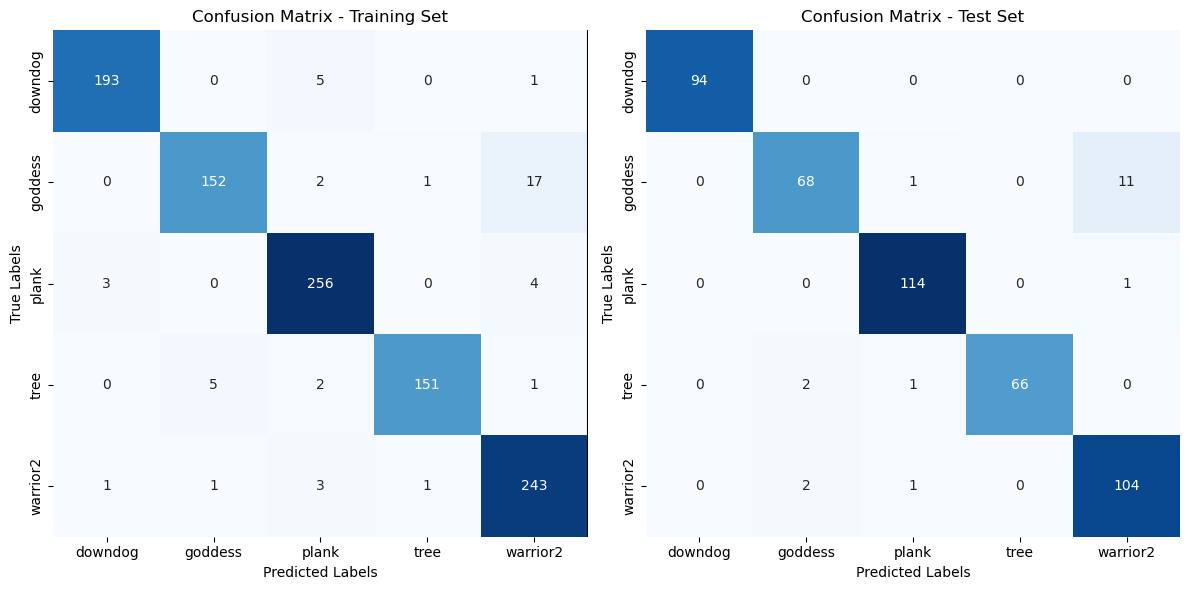

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

poses_mapping = {0: 'downdog', 1: 'goddess', 2: 'plank', 3: 'tree', 4: 'warrior2'}

# Training set evaluation
prediction_train = model2.predict(X_train_reshaped)
prediction_train = np.argmax(prediction_train, axis=1)

confusion_train = confusion_matrix(np.argmax(Y_train, axis=1), prediction_train)

# Test set evaluation
prediction_test = model2.predict(X_test_reshaped)
prediction_test = np.argmax(prediction_test, axis=1)

confusion_test = confusion_matrix(np.argmax(Y_test, axis=1), prediction_test)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for the training set
sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0], xticklabels=list(poses_mapping.values()), yticklabels=list(poses_mapping.values()))
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("Confusion Matrix - Training Set")

# Add a black border between the two matrices
axes[0].axvline(x=confusion_train.shape[1], color="black")

# Plot the confusion matrix for the test set
sns.heatmap(confusion_test, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1], xticklabels=list(poses_mapping.values()), yticklabels=list(poses_mapping.values()))
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Confusion Matrix - Test Set")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
